Student： Jun Pan

Requirement: 
The goal of this assignment is give you practice working with accuracy and other recommender system metrics. 
 
In this assignment you’re asked to do at least one or (if you like) both of the following:  • Work in a small group, and/or  • Choose a different dataset to work with from your previous projects.  
 
Deliverables 
 
1. As in your previous assignments, compare the accuracy of at least two recommender system algorithms against your offline data. 2. Implement support for at least one business or user experience goal such as increased serendipity, novelty, or diversity. 3. Compare and report on any change in accuracy before and after you’ve made the change in #2. 4. As part of your textual conclusion, discuss one or more additional experiments that could be performed and/or metrics that could be evaluated only if online evaluation was possible.  Also, briefly propose how you would design a reasonable online evaluation environment. 
 
You’ll find some of the material discussed in this week’s reading to be helpful in completing this project.  You may also want to look at papers online, or search for “recsys” on youtube or slideshare.net. 


SUMMARY of ACHIEVEMENT IN PROJECT 4

I used a new database MovieLens 100k datasets (https://grouplens.org/datasets/movielens/100k/) for this study.  it is a stable benchmark dataset. 100,000 ratings from 1000 users on 1700 movies. Released 4/1998.

This data set consists of: 100,000 ratings (1-5) from 943 users on 1682 movies. Each user has rated at least 20 movies. Simple demographic info for the users (age, gender, occupation, zip).

The data was collected through the MovieLens web site (movielens.umn.edu) during the seven-month period from September 19th, 
1997 through April 22nd, 1998. This data has been cleaned up - users who had less than 20 ratings or did not have complete demographic information were removed from this data set. Detailed descriptions of the data file can be found at the end of this file.

Compared to the previous 1M dataset, this data set is smaller in size.  The formate of the dataset is differenct compared to the 1M.  The format of this data set is different.  It is more difficult thant the 1M dataset for data wrangling.  The attributes are different in two datasets. The covered time period is shorther is this dataset compared to 1M dataset.

1. As in your previous assignments, compare the accuracy of at least two recommender system algorithms against your offline data.  
In this study, I established collaborate filtering user to user recommendation system and matrix facterization recommendation system. 

2. Implement support for at least one business or user experience goal such as increased serendipity, novelty, or diversity.
In this study, I did some preliminary analysis about impact of age or gender on ratings.  Interestingly, I found that senior citizen age (70 to 79) were very generous for giving highst ratings (score of 5).  Women and men had different view on certain movies.  Some movies, men had the tendency of giving higher ratings vice versa. Also, we excluded the movies with less than 50 users giving ratings in the collaborative filtering remommendation system. We exclueded those movies with less than 10% of users giving ratings in matrix facterization recommendation system.



3. Compare and report on any change in accuracy before and after you’ve made the change in #2.
By exclude some movie with less users giving rating, it will reduce the bias for some movie.  For Project 2, we did not exclude those movies with less than 50 ratings.  It caused very high RMSE value.  Althogh we did not test RMSE values here, we believed this model will improve the accuracy of prediction.

For the matrix facterization recommendation system, I used a exclusion for those moview have less than 10% of users to giving ratings. It reduced RMSE values comapared to Project 3. I believed this model had improved accuracy.  

4. As part of your textual conclusion, discuss one or more additional experiments that could be performed and/or metrics that could be evaluated only if online evaluation was possible.  Also, briefly propose how you would design a reasonable online evaluation environment. 

For all this project, I did study using offline evaluation models. There was no real-time or online data involved. For the following reason, we should use online recommendation model.
In a real-time situation, we would have a online streaming portal like Netflix. When a user watches movie, the algorithm will give recommendations about the other possible movies to be seen. Basicaly, an algorithm can recommend 5 - 100 movies(approximatly) based on user preference.  If the user finally watched one of the recommended movies and clicks though it, then the algorithm predicted the recommendations correctly. Recommendation clicks are validated by click-through rate (CTR). If the algorithm recommends 100 movies, and 10 are clicked, then the CTR is 10%.  In real-time, algorithms can be changed and compared with other algorithms via A/B testing.



In [22]:
import pandas as pd 
import numpy as np
import csv
import matplotlib.pyplot as plt
import math
from sklearn.metrics import pairwise_distances
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [23]:
#Define column for dataset.
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']

In [25]:
#load data
users=pd.read_csv("C:/Users/tbao/Desktop/Data612 Project 4 working folder/Project 4/data/u.user",encoding="ISO-8859-1", sep='|',names=u_cols)
ratings = pd.read_csv("C:/Users/tbao/Desktop/Data612 Project 4 working folder/Project 4/data/u.data",encoding="ISO-8859-1", sep='\t', names=r_cols)
movies = pd.read_csv("C:/Users/tbao/Desktop/Data612 Project 4 working folder/Project 4/data/u.item", encoding="ISO-8859-1", sep='|', names=m_cols, usecols=range(5))
movielens=pd.merge(users,ratings)
movielens=pd.merge(movielens,movies)
movielens.head(3)

,user_id,age,sex,occupation,zip_code,movie_id,rating,timestamp,title,release_date,video_release_date,imdb_url
0,1,24,M,technician,85711,61,4,878542420,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...
1,13,47,M,educator,29206,61,4,882140552,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...
2,18,35,F,other,37212,61,4,880130803,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...


In [26]:
movielens.describe()

,user_id,age,movie_id,rating,timestamp,video_release_date
count,100000.00000,100000.000000,100000.000000,100000.000000,1.000000e+05,0.0
mean,462.48475,32.969850,425.530130,3.529860,8.835289e+08,NaN
std,266.61442,11.562623,330.798356,1.125674,5.343856e+06,NaN
min,1.00000,7.000000,1.000000,1.000000,8.747247e+08,NaN
25%,254.00000,24.000000,175.000000,3.000000,8.794487e+08,NaN
50%,447.00000,30.000000,322.000000,4.000000,8.828269e+08,NaN
75%,682.00000,40.000000,631.000000,4.000000,8.882600e+08,NaN
max,943.00000,73.000000,1682.000000,5.000000,8.932866e+08,NaN


In [28]:
movielens.shape

(100000, 12)

(array([ 6110.,     0., 11370.,     0.,     0., 27145.,     0., 34174.,
            0., 21201.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

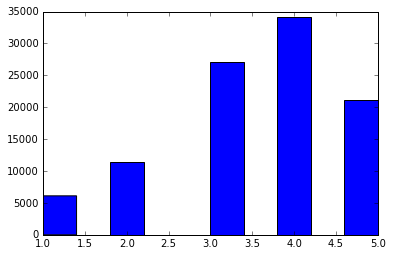

In [60]:
plt.hist(movielens["rating"])

In [61]:
print(movielens.head())

   user_id  age sex  occupation zip_code  movie_id  rating  timestamp  \
0        1   24   M  technician    85711        61       4  878542420   
1       13   47   M    educator    29206        61       4  882140552   
2       18   35   F       other    37212        61       4  880130803   
3       58   27   M  programmer    52246        61       5  884305271   
4       59   49   M    educator    08403        61       4  888204597   

                        title release_date  video_release_date  \
0  Three Colors: White (1994)  01-Jan-1994                 NaN   
1  Three Colors: White (1994)  01-Jan-1994                 NaN   
2  Three Colors: White (1994)  01-Jan-1994                 NaN   
3  Three Colors: White (1994)  01-Jan-1994                 NaN   
4  Three Colors: White (1994)  01-Jan-1994                 NaN   

                                            imdb_url age_group  
0  http://us.imdb.com/M/title-exact?Trzy%20kolory...     20-29  
1  http://us.imdb.com/M/title-exac

In [62]:
print(movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 5 columns):
movie_id              1682 non-null int64
title                 1682 non-null object
release_date          1681 non-null object
video_release_date    0 non-null float64
imdb_url              1679 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 65.8+ KB
None


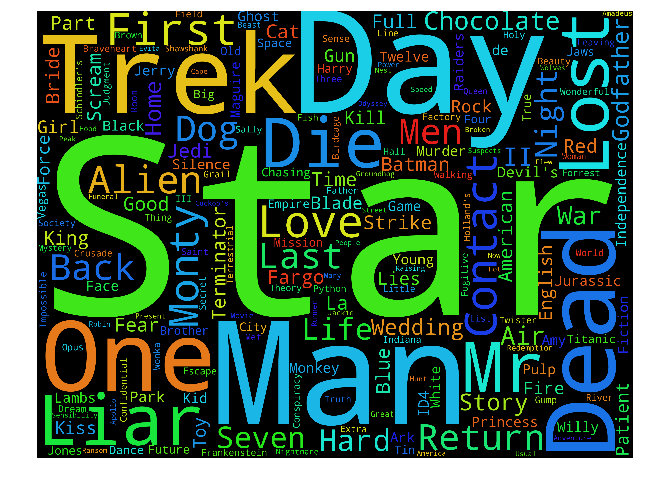

In [63]:
%matplotlib inline
import wordcloud
from wordcloud import WordCloud, STOPWORDS

movielens['title'] = movielens['title'].fillna("").astype('str')
title_corpus = ' '.join(movielens['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=3000, width=4000).generate(title_corpus)
plt.figure(figsize=(20,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

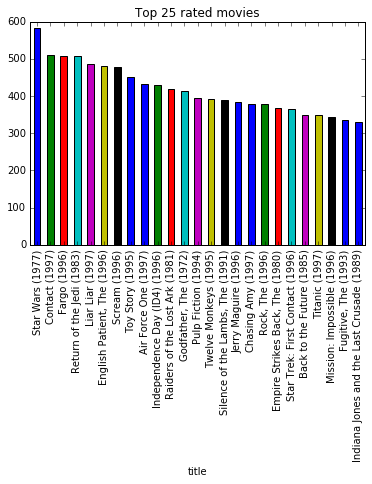

In [47]:
##top 25 rated movies (rating X size)
top_rated=movielens.groupby('title').size().sort_values(ascending=False)[:25]
top_rated.plot(kind="bar",title="Top 25 rated movies",label="count")

In [30]:
movie_stat = movielens.groupby('title').agg({'rating':[np.size,np.mean]})
movie_stat.sort_values([('rating','mean')],ascending=False).head()
#following result showing some movie only have one or two person rated, by them gave highest score. It showed on the top ranks.

rating     
                                             size mean
title                                                 
They Made Me a Criminal (1939)                  1  5.0
Marlene Dietrich: Shadow and Light (1996)       1  5.0
Saint of Fort Washington, The (1993)            2  5.0
Someone Else's America (1995)                   1  5.0
Star Kid (1997)                                 3  5.0

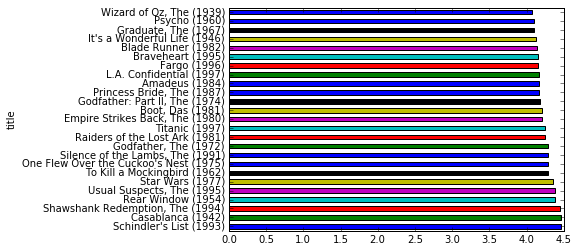

In [50]:
#In order to put popularity as a measurment.  So we choose a szie of 200 and check the results.
most200=movie_stat['rating']['size'] >= 200
most_rated_mean=movie_stat[most200].sort_values([('rating', 'mean')], ascending=False)
most_rated_mean['rating']['mean'].sort_values(ascending=False)[:25].plot(kind="barh")
#then we got the top 25 movies rated by more than 200 people.  We can see the ratings between 4 to 4.5 for those movie.

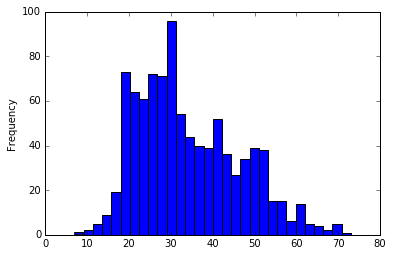

In [51]:
#Demorgraphic information of ages in the users group
users.age.plot.hist(bins=30)
plt.xlabel=("Age")
plt.ylabel=("count")
plt.title=("Age distribution")

In [52]:
#different age group may give different ratings.  Senior citizens are very generous to give rating.
toystory=movielens[movielens.movie_id==1]
toystory.shape
mov1 = movielens.sort_values("movie_id",ascending=True).head(452) ##we have 452 reviews approximately for Toystory
mov1.set_index('movie_id',inplace=True)
by_age = mov1.loc[mov1.index].groupby(['title', 'age_group']).agg([np.size,np.mean])
by_age

user_id                age            rating  \
                              size        mean   size       mean   size   
title            age_group                                                
Toy Story (1995) 10-19       16724  510.729730  16724  17.000000  16724   
                 20-29       85428  508.132275  85428  24.888889  85428   
                 30-39       54692  464.487603  54692  33.809917  54692   
                 40-49       31640  433.028571  31640  44.528571  31640   
                 50-59       13108  380.482759  13108  52.689655  13108   
                 60-69        2260  471.800000   2260  61.000000   2260   
                 70-79         452  767.000000    452  70.000000    452   

                                     timestamp                \
                                mean      size          mean   
title            age_group                                     
Toy Story (1995) 10-19      3.621622     16724  8.831738e+08   
                 20-29      3.920635     85428  8.824191e+08   
                 30-39      4.033058     54692  8.821978e+08   
                 40-49      3.700000     31640  8.841052e+08   
                 50-59      3.758621     13108  8.834829e+08   
                 60-69      3.400000      2260  8.855238e+08   
                 70-79      5.000000       452  8.914628e+08   

                           video_release_date       
                                         size mean  
title            age_group                          
Toy Story (1995) 10-19                16724.0  NaN  
                 20-29                85428.0  NaN  
                 30-39                54692.0  NaN  
                 40-49                31640.0  NaN  
                 50-59                13108.0  NaN  
                 60-69                 2260.0  NaN  
                 70-79                  452.0  NaN

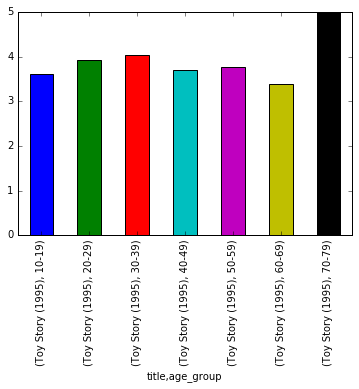

In [53]:
by_age['rating']['mean'].plot(kind="bar")
##as we could see between age 70-79 gave higher ratings for toystory

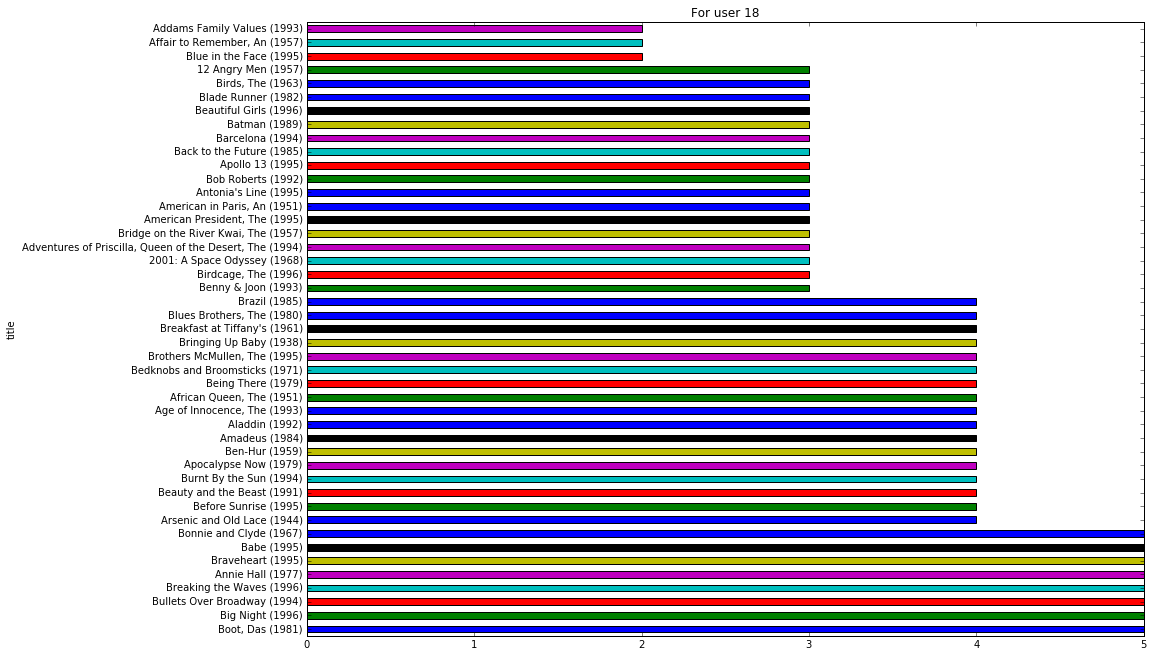

In [54]:
#Overview one user given ratings for differnt movies.
user1=movielens[movielens.user_id==18]
user1=user1.groupby('title').agg([np.size,np.mean])
user1['rating']['mean'][:45].sort_values(ascending=False).plot(kind="barh",figsize=(15,11),title="For user 18",label="Movie Name")

In [56]:
##Male and Female may give have different preference for movie ratings.

pivoted = movielens.pivot_table(index=['movie_id', 'title'],
                           columns=['sex'],
                           values='rating',
                           fill_value=0)
pivoted.head(10)

,sex,F,M
movie_id,title,,
1,Toy Story (1995),3.789916,3.909910
2,GoldenEye (1995),3.368421,3.178571
3,Four Rooms (1995),2.687500,3.108108
4,Get Shorty (1995),3.400000,3.591463
5,Copycat (1995),3.772727,3.140625
6,Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),3.600000,3.571429
7,Twelve Monkeys (1995),3.560976,3.861290
8,Babe (1995),4.050000,3.974843
9,Dead Man Walking (1995),3.927711,3.884259


In [57]:
#Check the difference
pivoted['diff'] = pivoted.M - pivoted.F
pivoted.head()

,sex,F,M,diff
movie_id,title,,,
1,Toy Story (1995),3.789916,3.909910,0.119994
2,GoldenEye (1995),3.368421,3.178571,-0.189850
3,Four Rooms (1995),2.687500,3.108108,0.420608
4,Get Shorty (1995),3.400000,3.591463,0.191463
5,Copycat (1995),3.772727,3.140625,-0.632102


In [58]:
pivoted.reset_index('movie_id', inplace=True)

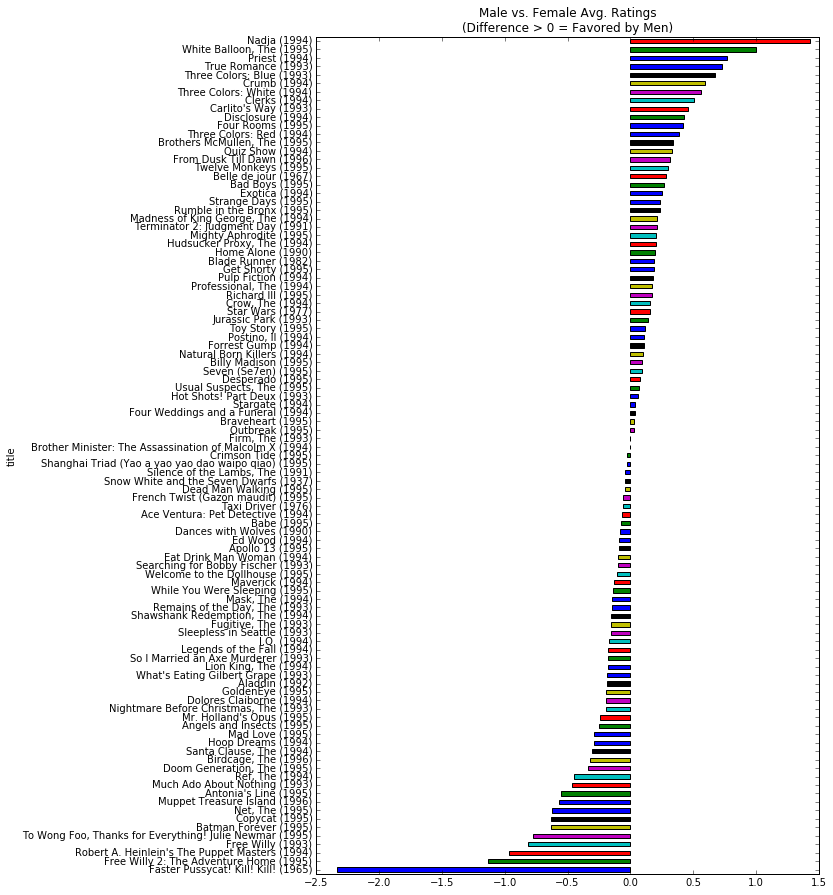

In [42]:
disagreements = pivoted[pivoted.movie_id.isin(movielens.head(100).index)]['diff']
disagreements.sort_values().plot(kind='barh', figsize=[9, 15],title=("Male vs. Female Avg. Ratings\n(Difference > 0 = Favored by Men)"))

In [92]:
##RECOMMENDER ENGINE 1: Collaborative Filtering User based
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

movielens.drop(movielens.columns[[3,4,7]], axis=1, inplace=True)
ratings.drop( "timestamp", inplace = True, axis = 1 ) 
movies.drop(movies.columns[[3,4]], inplace = True, axis = 1 )
#Dropping all the columns that are not really needed
movielens.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 10 columns):
user_id               100000 non-null int64
age                   100000 non-null int64
sex                   100000 non-null object
movie_id              100000 non-null int64
rating                100000 non-null int64
title                 100000 non-null object
release_date          99991 non-null object
video_release_date    0 non-null float64
imdb_url              99987 non-null object
age_group             100000 non-null category
dtypes: category(1), float64(1), int64(4), object(4)
memory usage: 10.2+ MB


In [93]:
movie_stats = movielens.groupby('title').agg({'rating': [np.size, np.mean]})
movie_stats.head()

rating          
                            size      mean
title                                     
'Til There Was You (1997)      9  2.333333
1-900 (1994)                   5  2.600000
101 Dalmatians (1996)        109  2.908257
12 Angry Men (1957)          125  4.344000
187 (1997)                    41  3.024390

In [94]:
#Setting a threshold of atleast 50 ratings for better analysis.
min_50 = movie_stats['rating']['size'] >= 50
movie_stats[min_50].sort_values([('rating', 'mean')], ascending=False).head()

rating          
                                                     size      mean
title                                                              
Close Shave, A (1995)                                 112  4.491071
Schindler's List (1993)                               298  4.466443
Wrong Trousers, The (1993)                            118  4.466102
Casablanca (1942)                                     243  4.456790
Wallace & Gromit: The Best of Aardman Animation...     67  4.447761

In [97]:
#pivot table
ratings_matrix = ratings.pivot_table(index=['movie_id'],columns=['user_id'],values='rating').reset_index(drop=True)
ratings_matrix.fillna( 0, inplace = True )
ratings_matrix.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
0,5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,...,2.0,3.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0
1,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,...,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
#Cosine similarity
movie_similarity = 1 - pairwise_distances( ratings_matrix.as_matrix(), metric="cosine" )
np.fill_diagonal( movie_similarity, 0 ) #Filling diagonals with 0s for future use when sorting is done
ratings_matrix = pd.DataFrame( movie_similarity )
ratings_matrix.head(5)

C:\Users\tbao\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,0.000000,0.402382,0.330245,0.454938,0.286714,0.116344,0.620979,0.481114,0.496288,0.273935,...,0.035387,0.0,0.000000,0.000000,0.035387,0.0,0.0,0.0,0.047183,0.047183
1,0.402382,0.000000,0.273069,0.502571,0.318836,0.083563,0.383403,0.337002,0.255252,0.171082,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.078299,0.078299
2,0.330245,0.273069,0.000000,0.324866,0.212957,0.106722,0.372921,0.200794,0.273669,0.158104,...,0.000000,0.0,0.000000,0.000000,0.032292,0.0,0.0,0.0,0.000000,0.096875
3,0.454938,0.502571,0.324866,0.000000,0.334239,0.090308,0.489283,0.490236,0.419044,0.252561,...,0.000000,0.0,0.094022,0.094022,0.037609,0.0,0.0,0.0,0.056413,0.075218
4,0.286714,0.318836,0.212957,0.334239,0.000000,0.037299,0.334769,0.259161,0.272448,0.055453,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.094211


In [99]:
#Recommender Engine

try:
    #user_inp=input('Enter the reference movie title based on which recommendations are to be made: ')
    user_inp="Speed (1994)"
    inp=movies[movies['title']==user_inp].index.tolist()
    inp=inp[0]
    
    movies['similarity'] = ratings_matrix.iloc[inp]
    movies.columns = ['movie_id', 'title', 'release_date','similarity']
    movies.head(2)
    
except:
    print("Sorry, the movie is not in the database!")

In [100]:
print("Recommended movies based on your choice of ",user_inp ,": \n", movies.sort_values( ["similarity"], ascending = False )[1:10])

Recommended movies based on your choice of  Speed (1994) : 
      movie_id                                      title release_date  \
384       385                           True Lies (1994)  01-Jan-1994   
160       161                             Top Gun (1986)  01-Jan-1986   
78         79                       Fugitive, The (1993)  01-Jan-1993   
95         96          Terminator 2: Judgment Day (1991)  01-Jan-1991   
194       195                     Terminator, The (1984)  01-Jan-1984   
173       174             Raiders of the Lost Ark (1981)  01-Jan-1981   
209       210  Indiana Jones and the Last Crusade (1989)  01-Jan-1989   
549       550          Die Hard: With a Vengeance (1995)  01-Jan-1995   
203       204                  Back to the Future (1985)  01-Jan-1985   

     similarity  
384    0.719504  
160    0.707567  
78     0.696583  
95     0.695556  
194    0.676778  
173    0.676664  
209    0.674811  
549    0.674143  
203    0.665776  


In [101]:
#Toy Story (1995)
try:
    #user_inp=input('Enter the reference movie title based on which recommendations are to be made: ')
    user_inp="Toy Story (1995)"
    inp=movies[movies['title']==user_inp].index.tolist()
    inp=inp[0]
    
    movies['similarity'] = ratings_matrix.iloc[inp]
    movies.columns = ['movie_id', 'title', 'release_date','similarity']
    movies.head(2)
    
except:
    print("Sorry, the movie is not in the database!")

In [102]:
print("Recommended movies based on your choice of ",user_inp ,": \n", movies.sort_values( ["similarity"], ascending = False )[1:10])

Recommended movies based on your choice of  Toy Story (1995) : 
      movie_id                                         title release_date  \
180       181                     Return of the Jedi (1983)  14-Mar-1997   
120       121                 Independence Day (ID4) (1996)  03-Jul-1996   
116       117                              Rock, The (1996)  07-Jun-1996   
404       405                    Mission: Impossible (1996)  22-May-1996   
150       151  Willy Wonka and the Chocolate Factory (1971)  01-Jan-1971   
221       222               Star Trek: First Contact (1996)  22-Nov-1996   
99        100                                  Fargo (1996)  14-Feb-1997   
236       237                          Jerry Maguire (1996)  13-Dec-1996   
173       174                Raiders of the Lost Ark (1981)  01-Jan-1981   

     similarity  
180    0.699925  
120    0.689786  
116    0.664555  
404    0.641322  
150    0.638158  
221    0.636727  
99     0.630601  
236    0.624075  
173    0.622

In [109]:
##RECOMMEND ENGINE 2: 
#Mactrix Facterization Recommendation Systerm
print(ratings.shape)  # 100K entries
user_count = len(set(ratings['user_id'])) # should be 943 users
print(user_count)
movie_count = len(set(ratings['movie_id']))  # should be 1682 movies
print(movie_count)

(100000, 3)
943
1682


In [110]:
# Verify how many movies each user has rated.
ratings['user_id'].value_counts()

405    737
655    685
13     636
450    540
276    518
416    493
537    490
303    484
234    480
393    448
181    435
279    434
429    414
846    405
7      403
94     400
682    399
308    397
92     388
293    388
222    387
201    386
59     382
435    379
378    375
880    368
417    365
896    362
592    360
796    358
      ... 
418     20
242     20
558     20
685     20
812     20
364     20
300     20
631     20
873     20
809     20
166     20
740     20
36      20
866     20
34      20
143     20
824     20
888     20
926     20
441     20
93      20
732     20
475     20
571     20
596     20
147     20
19      20
572     20
636     20
895     20
Name: user_id, Length: 943, dtype: int64

In [111]:
# Find out how many users have rated for each movie
users_per_mov = ratings['movie_id'].value_counts()
users_per_mov

50      583
258     509
100     508
181     507
294     485
286     481
288     478
1       452
300     431
121     429
174     420
127     413
56      394
7       392
98      390
237     384
117     378
172     367
222     365
313     350
204     350
405     344
79      336
210     331
151     326
173     324
69      321
748     316
168     316
269     315
       ... 
1653      1
1526      1
1654      1
1669      1
1458      1
1309      1
1647      1
1581      1
1645      1
814       1
1671      1
1543      1
1679      1
1564      1
1582      1
711       1
1583      1
1627      1
1649      1
1563      1
1670      1
1606      1
1520      1
1414      1
1584      1
1648      1
1571      1
1329      1
1457      1
1663      1
Name: movie_id, Length: 1682, dtype: int64

In [112]:
#Exclude those movies have less than 10% of users given ratings
(users_per_mov > (user_count * 0.1)).sum()

353

In [113]:
# Extract the list of 353 movie ids
mov_list = users_per_mov[users_per_mov > (user_count * 0.1)]
mov_list

50      583
258     509
100     508
181     507
294     485
286     481
288     478
1       452
300     431
121     429
174     420
127     413
56      394
7       392
98      390
237     384
117     378
172     367
222     365
313     350
204     350
405     344
79      336
210     331
151     326
173     324
69      321
748     316
168     316
269     315
       ... 
747     102
554     102
317     102
699     102
404     101
264     101
378     101
708     101
926     101
159     101
232     101
1012    100
665     100
381     100
682     100
436      99
155      98
507      98
1014     98
356      97
33       97
429      97
126      97
290      96
755      96
306      96
919      96
90       95
131      95
477      95
Name: movie_id, Length: 353, dtype: int64

In [119]:
# create new dataset with rows containing only those 353 movie ids
data_mov = ratings[ratings['movie_id'].isin(mov_list.index)]

In [120]:
#Create User-Item-Rating Matrix (COO_matrix)
from scipy.sparse import coo_matrix
R = coo_matrix((data_mov['rating'].astype('float'),
                (data_mov['user_id']-1, data_mov['movie_id']-1)))

In [121]:
R.shape

(943, 1047)

In [122]:
print(R.data.shape)
print(R.row.shape)
print(R.col.shape)

(66269,)
(66269,)
(66269,)


In [123]:
##Training recommender system
#Training Set: all Rui's > 0 since 0 means no rating
#Loss Function: Root Mean Square Error (RMSE) with regularization between Actual and Predicted Rui's
#Optimization Function: Stochastic Gradient Descent (SGD)
#Training Outcome: To adjust P and Q until RMSE < 0.5 or epoch = 10, whichever comes earlier

# this function will return the error between the actual rating and the ratings calculated from P and Q matrices
# predicted rating is calculated using the formula 
# pow(rui-np.dot(P[u,:],Q[:,i]),2)+ lamda*(pow(norm(P[u,:]),2)+pow(norm(Q[:,i]),2
from numpy.linalg import norm
import numpy as np
def error(R,P,Q,reg=0.02):
    ratings = R.data
    rows = R.row
    cols = R.col
    e = 0 
    # go through every rating 
    for ui in range(len(ratings)): # Only non-zero ratings are considered as elements in the ratings vector
        # Save the rating, user code and movie code
        rui=ratings[ui]
        u = rows[ui]
        i = cols[ui]
        if rui>0:
            # Find the sum of errors
            e= e + pow(rui-np.dot(P[u,:],Q[:,i]),2)+\
                reg*(pow(norm(P[u,:]),2)+pow(norm(Q[:,i]),2))
    return e


In [129]:
# Function that will calculate P and Q matrices using stochastic gradient descent
def SGD(R, K, reg=0.02,steps=10, lrate=0.001):
    # Initialise the P and Q Factor Matrices with random numbers
    # Setup the dimensions 
    # M - No. of users
    # N - No. of items
    # K - No. of features
    sigma = 0.1
    M,N = R.shape
    P = np.random.rand(M,K) * sigma
    Q = np.random.rand(K,N) * sigma
    
    # calculate the initial RMSE
    rmse = np.sqrt(error(R,P,Q,reg)/len(R.data))
    print("Initial RMSE:" + str(rmse))
    
    # complete the specified number of steps for gradient descent
    for step in range(steps):
        # complete the specified number of steps for gradient descent 
        for ui in range(len(R.data)):
            rui=R.data[ui]
            u = R.row[ui]
            i = R.col[ui]
            if rui>0:
                # update P, Q in the direction of local minima
                eui=rui-np.dot(P[u,:],Q[:,i])
                P[u,:]=P[u,:]+lrate*2*(eui*Q[:,i]-reg*P[u,:])
                Q[:,i]=Q[:,i]+lrate*2*(eui*P[u,:]-reg*Q[:,i])
        rmse = np.sqrt(error(R,P,Q,reg)/len(R.data))
        print(step, rmse)
        if rmse<0.5:
            break
    print("Final RMSE: "+ str(rmse))
    return P,Q

In [130]:
# call the SGD to calculate P,Q
(P,Q)=SGD(R,K=2,lrate=0.0007,reg=0.01, steps=100)

Initial RMSE:3.8399075930785314
0 3.817331175322705
1 3.702540138191749
2 3.2397275291686616
3 2.357099198794873
4 1.745218516537698
5 1.4328989710758782
6 1.2541356453985468
7 1.1472176196067583
8 1.081652953200262
9 1.0404351359131156
10 1.0138258756340788
11 0.996172054488603
12 0.9841461764786242
13 0.9757530264121054
14 0.9697681017360309
15 0.9654200536487989
16 0.9622098535816479
17 0.9598062969625367
18 0.9579843613005039
19 0.9565879521703131
20 0.9555068026915983
21 0.954661780099491
22 0.9539953119151168
23 0.9534650086043127
24 0.9530393304161018
25 0.9526945909477614
26 0.9524128527168576
27 0.9521804288920324
28 0.9519868036484971
29 0.9518238458073138
30 0.9516852305756409
31 0.951566010627995
32 0.9514622954518457
33 0.9513710099001959
34 0.9512897111739819
35 0.9512164492360875
36 0.951149659733462
37 0.9510880814090835
38 0.9510306920739062
39 0.9509766587234861
40 0.9509252984913567
41 0.9508760479450893
42 0.9508284388352877
43 0.9507820788568224
44 0.95073663631946

In [131]:
# call the SGD to calculate P,Q
(P,Q)=SGD(R,K=20,lrate=0.0007,reg=0.01, steps=100)

Initial RMSE:3.7975396807734834
0 3.594201799624928
1 2.903174426067798
2 1.9936382404144875
3 1.5220374474261762
4 1.2902695811145237
5 1.161570243395355
6 1.086762214529267
7 1.0416606187905058
8 1.0134686318804176
9 0.9952157366905136
10 0.9830039744242732
11 0.9745904164627988
12 0.9686433825414819
13 0.9643459575122783
14 0.9611806431378087
15 0.9588096220736385
16 0.9570063339329551
17 0.9556151929479926
18 0.9545271426750862
19 0.9536643788614998
20 0.9529705368670625
21 0.9524042307758785
22 0.9519347046699299
23 0.9515388484217998
24 0.9511991149081767
25 0.9509020446119233
26 0.9506372066709621
27 0.9503964298426469
28 0.9501732380145826
29 0.9499624317381312
30 0.949759775095761
31 0.9495617592568393
32 0.9493654223313847
33 0.949168210863757
34 0.9489678723381216
35 0.9487623709324796
36 0.9485498208163685
37 0.948328432783155
38 0.9480964711056895
39 0.9478522183213839
40 0.947593946268941
41 0.9473198921724381
42 0.9470282389391184
43 0.9467170991354538
44 0.9463845023514

In [132]:
# call the SGD to calculate P,Q
(P,Q)=SGD(R,K=40,lrate=0.0007,reg=0.01, steps=100)

Initial RMSE:3.7500595352769746
0 3.3744483506209844
1 2.445418227968795
2 1.6922436540026695
3 1.3627662041555122
4 1.1963118442744316
5 1.1041293773686645
6 1.0506272452976033
7 1.0182078052779266
8 0.9977359419715784
9 0.9843052384073138
10 0.9751881895609839
11 0.9688127951270915
12 0.9642389392636531
13 0.960883732679505
14 0.958373387238535
15 0.9564608298927771
16 0.9549783524116223
17 0.9538094773672908
18 0.9528716942301416
19 0.9521055421707235
20 0.9514675155707595
21 0.9509253408358181
22 0.9504547645418596
23 0.9500373285365797
24 0.9496588035712308
25 0.9493080706887345
26 0.9489763121121623
27 0.948656419177243
28 0.9483425544241331
29 0.9480298244424248
30 0.9477140331256011
31 0.9473914938942425
32 0.9470588856061863
33 0.9467131411933882
34 0.9463513611379932
35 0.9459707461163198
36 0.9455685447601261
37 0.9451420136883056
38 0.9446883878687268
39 0.9442048600650128
40 0.9436885686576186
41 0.9431365935438889
42 0.9425459601334504
43 0.941913651677502
44 0.9412366303

In [133]:
# call the SGD to calculate P,Q
(P,Q)=SGD(R,K=100,lrate=0.005,reg=0.02, steps=20)

Initial RMSE:3.6067679147735956
0 1.058554090832403
1 1.0095059808634315
2 1.003033730859452
3 0.9995622392793252
4 0.9955422476427537
5 0.9897327771753506
6 0.9811306030109422
7 0.9693355892093173
8 0.9551602586008711
9 0.9397698430888363
10 0.9234531672349845
11 0.9060862088259165
12 0.8878397861489752
13 0.869152448506688
14 0.8505023761395726
15 0.8322968137612844
16 0.8148542409688454
17 0.7984118696135656
18 0.7831310080201886
19 0.7690993468171126
Final RMSE: 0.7690993468171126


In [134]:
P.shape

(943, 100)

In [135]:
Q.shape

(100, 1047)

In [152]:
#Top Movies Prediction/Recommendations for the Active User
#user_id=13, top 5 movies recommended

ACTIVE_USER = 13  # user id
N = 5   # top N movies to be recommended

In [153]:
# identify movies rated by active user
active_user_movies = []
for i in range(len(R.row)):
    if R.row[i] == ACTIVE_USER-1:
        active_user_movies.append(R.col[i])
len(active_user_movies)  

281

In [154]:
# predict movie ratings for ACTIVE USER
pred_rui = list(np.dot(P[ACTIVE_USER-1, :], Q))
len(pred_rui)

1047

In [155]:
# remove movies that are rated by ACTIVE USER, find top N movie recommendations
df = pd.DataFrame(pred_rui)
df.iloc[214]

0    5.153148
Name: 214, dtype: float64

In [156]:
data_mov[data_mov['user_id']==258]

,user_id,movie_id,rating
2181,258,288,1
3757,258,323,4
6470,258,313,5
7186,258,310,5
11059,258,751,5
11283,258,315,3
16639,258,243,3
18412,258,748,5
19074,258,690,4
19145,258,289,2


In [157]:
pred_movie_sorted = df.drop(active_user_movies).sort_values(0, ascending=False)
pred_movie_sorted

,0
168,4.928254
133,4.626625
256,4.607799
478,4.574272
407,4.556191
76,4.462464
135,4.449974
495,4.376534
520,4.361523
527,4.325091
